In [1]:
from PIL import Image
%matplotlib inline
import numpy
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt

from skimage import data

In [2]:
photo_data = misc.imread('test_planet.tif')
photo_data2 = misc.imread('20171011_013118_0c46/20171011_013118_0c46_3B_AnalyticMS_DN_udm.tif')
#photo_data2 = misc.imread('20171011_013118_0c46/20171011_013118_0c46_3B_AnalyticMS.tif')

type(photo_data2)

/Users/denisrubanga/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.
/Users/denisrubanga/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


numpy.ndarray

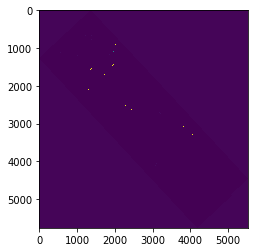

In [3]:
#plt.figure(figsize=(15,15))
plt.imshow(photo_data2)

In [4]:
photo_data2.shape

(5758, 5530)

In [5]:
photo_data2.size

31841740

In [6]:
photo_data2.min(), photo_data.max()

(0, 66)

In [7]:
photo_data2.mean()

0.65913979575236781

In [8]:

#imarray = numpy.array(im)

In [9]:
#imarray.shape

In [10]:
#im.size

## TIFF Viewer


In [11]:
from PIL import Image
im = Image.open('20171011_013118_0c46/20171011_013118_0c46_3B_AnalyticMS_DN_udm.tif')
im.show()

# PLANETS NDVI

## Step 1. Download a 4-Band image 

First, download a 4-band Planetscope image of agricultural land in Toledo, Spain (id: 20161218_101700_0e0d). You can do this using the Planet API, or with Planet Explorer, by filtering for '4 Band PlanetScope scene' (PSScene4Band) or 'Planetscope ortho tile' (PSOrthoTile), and downloading an 'analytic' asset.

Using the Planet Data API client:

## Step 2. Extract the Visible Red and NIR bands

Reference https://www.planet.com/docs/guides/quickstart-ndvi/

https://github.com/planetlabs/notebooks/blob/master/jupyter-notebooks/ndvi/ndvi_planetscope.ipynb

In [13]:
import rasterio
import numpy

image_file = "20171011_013121_0c46/20171011_013121_0c46_3B_AnalyticMS.tif"

# Load red and NIR bands - note all PlanetScope 4-band images have band order BGRN
with rasterio.open(image_file) as src:
    band_red = src.read(3)

with rasterio.open(image_file) as src:
    band_nir = src.read(4)

## Step 3. Normalize to Top of Atmosphere Reflectance

### Converting the pixel values to TOA Reflectance makes the analysis more accurate, and comparable with other scenes. Load the TOA Reflectance coefficients from the metadata XML asset.

In [14]:
from xml.dom import minidom

xmldoc = minidom.parse("20171011_013121_0c46/20171011_013121_0c46_3B_AnalyticMS_metadata.xml")
nodes = xmldoc.getElementsByTagName("ps:bandSpecificMetadata")

# XML parser refers to bands by numbers 1-4
coeffs = {}
for node in nodes:
    bn = node.getElementsByTagName("ps:bandNumber")[0].firstChild.data
    if bn in ['1', '2', '3', '4']:
        i = int(bn)
        value = node.getElementsByTagName("ps:reflectanceCoefficient")[0].firstChild.data
        coeffs[i] = float(value)


#### Multiply the band values by the TOA Reflectance coefficients.

In [15]:
# Multiply by corresponding coefficients
band_red = band_red * coeffs[3]
band_nir = band_nir * coeffs[4]


## Step 4. Perform the NDVI calculation 

Next we perform the NDVI calculation through subtraction and division of the pixel values.

In [16]:
# Allow division by zero
numpy.seterr(divide='ignore', invalid='ignore')

# Calculate NDVI
ndvi = (band_nir.astype(float) - band_red.astype(float)) / (band_nir + band_red)

## Step 5. Save the NDVI image

Finally we output these new pixel values to a new image file, making sure we mirror the GeoTIFF spatial metadata:


In [ ]:
# Set spatial characteristics of the output object to mirror the input
kwargs = src.meta
kwargs.update(
    dtype=rasterio.float32,
    count = 1)

# Create the file
with rasterio.open('ndvi_21.tif', 'w', **kwargs) as dst:
        dst.write_band(1, ndvi.astype(rasterio.float32))



/Users/denisrubanga/anaconda/lib/python2.7/site-packages/rasterio/__init__.py:160: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  transform = guard_transform(transform)


## Step 6. Apply a color map

Applying a color map can help to visually distinguish vegetation. For more color map options check out the docs for matplotlib.

In [ ]:
import matplotlib.pyplot as plt
plt.imsave("ndvi_cmap_21.png", ndvi, cmap=plt.cm.summer)
plt.show()


<p style="font-family: Arial;text-align: center; font-size:1.30em;color:#2462C0; font-style:bold">Image 18 </p>
<img src="ndvi_cmap_18.png" style="width: 950px; height: 500px; ">

<p style="font-family: Arial;text-align: center; font-size:1.30em;color:#2462C0; font-style:bold">Image 19 </p>
<img src="ndvi_cmap_19.png" style="width: 950px; height: 500px; ">

<p style="font-family: Arial;text-align: center; font-size:1.30em;color:#2462C0; font-style:bold">Image 20 </p>
<img src="ndvi_cmap_20.png" style="width: 950px; height: 500px;">

<p style="font-family: Arial;text-align: center; font-size:1.30em;color:#2462C0; font-style:bold">Image 21 </p>
<img src="ndvi_cmap_21.png" style="width: 950px; height: 500px; ">